# Result project AlN

# 1 Numerical convergence (Bulk using GGA-PBE)

- Quantify the convergence of different output values with respect to the energy cutoff 

- Quantify the convergence of different output values with respect to the k-point density 

- Distinguish between convergence of the total energy and a relative energ 


### 1.1.1 Convergence of forces, pressure, total energy and band gap with respect to the energy cutoff

- Using the convergece criterion 

pressure:

$$\frac{\Delta P}{\Delta Cutoff} < \frac{3[KPa]}{50 [eV]}$$


Energy:

  $$\frac{\Delta E_{abs}}{\Delta Cutoff} < \frac{3[meV]}{50 [eV]}$$  



### 1.1.2 Convergence of forces, pressure, total energy and band gap with respect to the energy cutoff 
- Varying one atom in the structure a litle (0.01nm)
- Using the convergece criterion 

pressure:

$$\frac{\Delta P}{\Delta Kpoints} < \frac{3[KPa]}{1}$$


Energy:

  $$\frac{\Delta E_{abs}}{\Delta Kpoints} < \frac{3[meV]}{1}$$  




# Size convergence 

In [1]:
import pandas as pd
import numpy as np  
# from pandas import DataFrame

PATH_TEXT_FILE_1 = '/home/luis/master_thesis_uio/thesis_project/python_code/data_csv/supercell/energy_convergence_size_accurate.csv'
PATH_TEXT_FILE_2 = '/home/luis/master_thesis_uio/thesis_project/python_code/data_csv/supercell/energy_convergence_defect_size_accurate.csv'

# read text file into pandas DataFrame
read_data_csv_1 = pd.read_csv(PATH_TEXT_FILE_1,delimiter = "\t")

# read text file into pandas DataFrame
read_data_csv_2 = pd.read_csv(PATH_TEXT_FILE_2,delimiter = "\t")

# Make a matrix with data.csv
matrix_data_vaspout = np.array(read_data_csv_1)
energies = matrix_data_vaspout[:,3]
number_atoms = matrix_data_vaspout[:,4]

energy_by_atom = energies/number_atoms

# Make a matrix with data.csv
defect_vaspout = np.array(read_data_csv_2)
defect_energies = defect_vaspout[:,3]

defect_energies_by_atom = defect_energies/(number_atoms -1) 

energies_difference =defect_energies - energies 

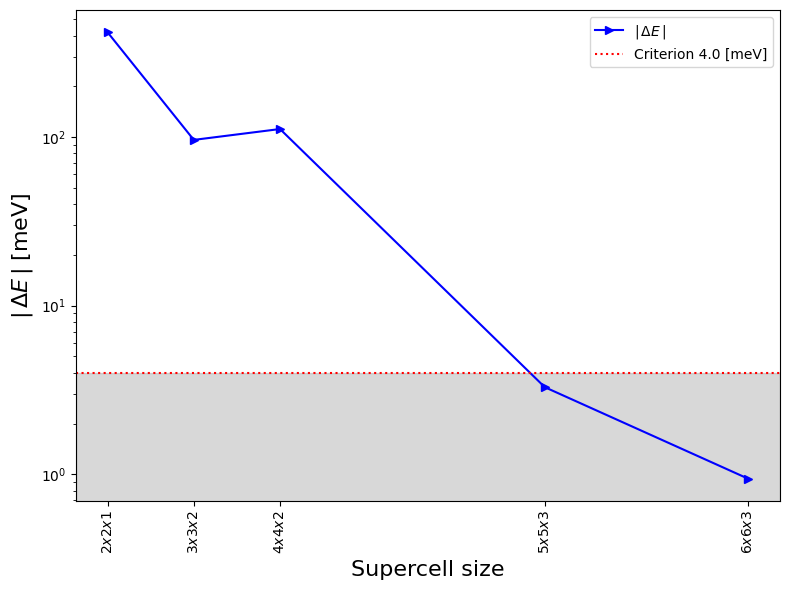

In [2]:
from VaspDefAnalysis.plotter.plot_convergence import ConvergencePlot

plot = ConvergencePlot.get_diff_convergence_plot(relative_values=energies_difference,
                                                 cutoff_values=number_atoms,
                                                 conv_criterion= 0.004,
                                                 #title_name= "Relative energy vs Supercell size",
                                                 title_name = None,
                                                 axis_x_name="Supercell size",
                                                 axis_y_name= r'$|\,\Delta E \,| $',
                                                 label_relative_values= r'$|\,\Delta E \,| $',
                                                 y_log=True,
                                                 curve_settings ={"color":"blue","marker": ">"},
                                                 SI_unit="eV",
                                                 #use_SI_prefixes=None
                                                 )
ax = plot.get_axes()[0]  # Get the first (or only) axis
x_values = number_atoms[:-1]  # Use the actual values
x_labels = [r"$2 x 2 x 1$", 
            r"$3 x 3 x 2$", 
            r"$4 x 4 x 2$", 
            r"$5 x 5 x 3$", 
            r"$6 x 6 x 3$"]
ax.set_xticks(x_values)  # Ensure the x-ticks match actual positions
ax.set_xticklabels(x_labels, rotation=90.0, ha="center")  # Set labels
plot.tight_layout()
plot.savefig(fname='/home/luis/master_thesis_uio/thesis_project/python_code/outputs/supercell/convergence/energy_vs_size',dpi=400)
plot.savefig(fname='/home/luis/master_thesis_uio/thesis_project/python_code/outputs/supercell/convergence/convergence_relative_energy_vs_size',dpi=400)

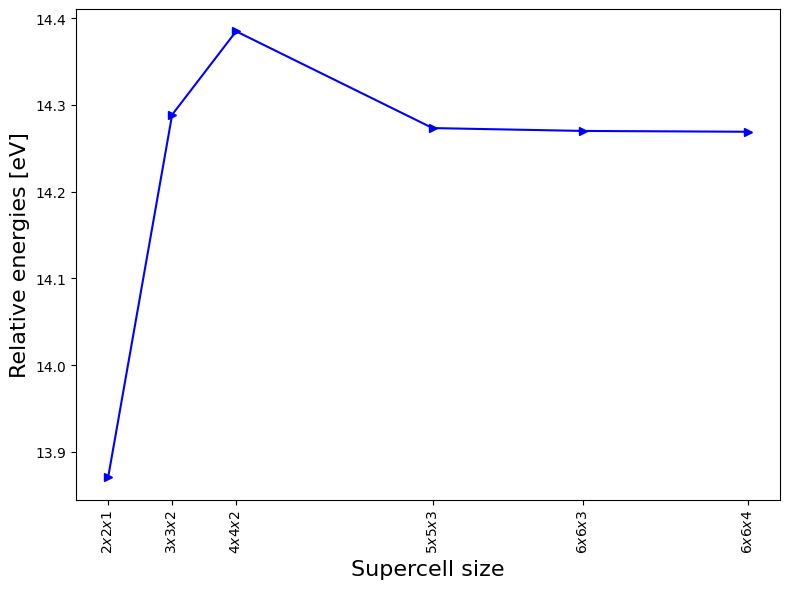

In [3]:
from VaspDefAnalysis.plotter.plot_convergence import ConvergencePlot

plot = ConvergencePlot.get_convergence_plot(relative_values=energies_difference,
                                            cutoff_values=number_atoms,
                                            #title_name= "Relative energy vs Supercell size",
                                            title_name = None,
                                            axis_x_name="Supercell size",
                                            axis_y_name = 'Relative energies',
                                            curve_settings ={"color":"blue","marker": ">"},
                                            SI_unit="eV",
                                            use_SI_prefixes=None
                                            )

ax = plot.get_axes()[0]  # Get the first (or only) axis
x_values = number_atoms  # Use the actual values
x_labels = [r"$2 x 2 x 1$", 
            r"$3 x 3 x 2$", 
            r"$4 x 4 x 2$", 
            r"$5 x 5 x 3$", 
            r"$6 x 6 x 3$", 
            r"$6 x 6 x 4$"]
ax.set_xticks(x_values)  # Ensure the x-ticks match actual positions
ax.set_xticklabels(x_labels, rotation=90.0, ha="center")  # Set labels
plot.tight_layout()
plot.savefig(fname='/home/luis/master_thesis_uio/thesis_project/python_code/outputs/supercell/convergence/energy_vs_size',dpi=400)


# Energy cutoff convergence 

In [5]:
import pandas as pd
import numpy as np  
# from pandas import DataFrame

PATH_TEXT_FILE_1 = '/home/luis/master_thesis_uio/thesis_project/python_code/data_csv/supercell/energies_convergence_accurate.csv'
PATH_TEXT_FILE_2 = '/home/luis/master_thesis_uio/thesis_project/python_code/data_csv/supercell/energies_convergence_defect_accurate.csv'

# read text file into pandas DataFrame
read_data_csv_1 = pd.read_csv(PATH_TEXT_FILE_1,delimiter = "\t")

# read text file into pandas DataFrame
read_data_csv_2 = pd.read_csv(PATH_TEXT_FILE_2,delimiter = "\t")

# Make a matrix with data.csv
matrix_data_vaspout = np.array(read_data_csv_1)
Maxforces = matrix_data_vaspout[:,0]
Pressure = matrix_data_vaspout[:,2]
energies = matrix_data_vaspout[:,3]
cutoffs = matrix_data_vaspout[:,4]

energy_by_atom = energies/432

# Make a matrix with data.csv
matrix_data_defect_vaspout = np.array(read_data_csv_2)
defect_Maxforces = matrix_data_defect_vaspout[:,0]
defect_Pressure = matrix_data_defect_vaspout[:,2]
defect_energies = matrix_data_defect_vaspout[:,3]

defect_energies_by_atom = defect_energies/431

energies_difference =  defect_energies - energies  #defect_energies_by_atom- energy_by_atom

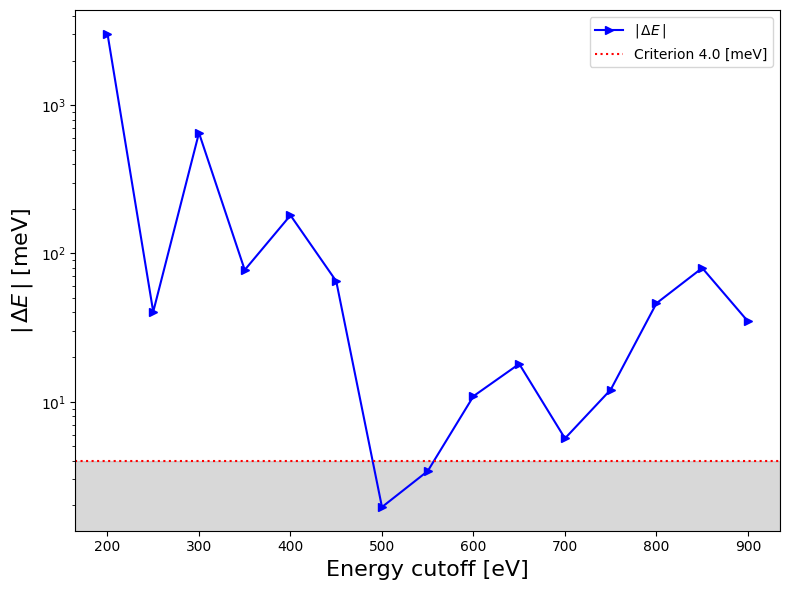

In [6]:
from VaspDefAnalysis.plotter.plot_convergence import ConvergencePlot

plot = ConvergencePlot.get_diff_convergence_plot(relative_values=energies_difference,
                                                 cutoff_values=cutoffs,
                                                 conv_criterion= 0.004,
                                                 #title_name= "Relative energy vs Energy cutoff",
                                                 title_name = None,
                                                 axis_x_name= "Energy cutoff [eV]",
                                                 axis_y_name= r'$|\,\Delta E \,| $',
                                                 label_relative_values= r'$|\,\Delta E \,| $',
                                                 y_log=True,
                                                 curve_settings ={"color":"blue","marker": ">"},
                                                 SI_unit="eV")
plot.savefig(fname='/home/luis/master_thesis_uio/thesis_project/python_code/outputs/supercell/convergence/convergence_relative_energy_vs_cutoff',dpi=400)

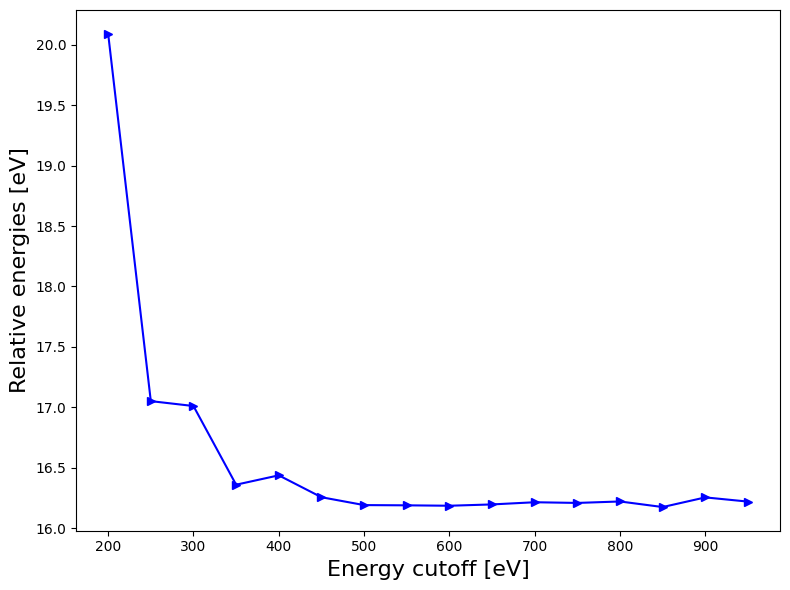

In [7]:
from VaspDefAnalysis.plotter.plot_convergence import ConvergencePlot

plot = ConvergencePlot.get_convergence_plot(relative_values=energies_difference,
                                            cutoff_values=cutoffs,
                                            #title_name = "Relative energy vs Energy cutoff",
                                            title_name = None,
                                            axis_x_name = "Energy cutoff [eV]",
                                            axis_y_name = 'Relative energies',
                                            curve_settings ={"color":"blue","marker": ">"},
                                            SI_unit="eV",
                                            use_SI_prefixes=None
                                             )
plot.savefig(fname='/home/luis/master_thesis_uio/thesis_project/python_code/outputs/supercell/convergence/energy_vs_cutoff',dpi=400)

# KPOINT relative density convergence 

In [9]:
import pandas as pd
import numpy as np  
# from pandas import DataFrame

PATH_TEXT_FILE_1 = '/home/luis/master_thesis_uio/thesis_project/python_code/data_csv/supercell/kdensity_convergence.csv'
PATH_TEXT_FILE_2 = '/home/luis/master_thesis_uio/thesis_project/python_code/data_csv/supercell/kdensity_convergence_defect.csv'

# read text file into pandas DataFrame
read_data_csv_1 = pd.read_csv(PATH_TEXT_FILE_1,delimiter = "\t")

# read text file into pandas DataFrame
read_data_csv_2 = pd.read_csv(PATH_TEXT_FILE_2,delimiter = "\t")

# Make a matrix with data.csv
matrix_data_vaspout = np.array(read_data_csv_1)
Maxforces = matrix_data_vaspout[:,0]
Pressure = matrix_data_vaspout[:,2]
energies = matrix_data_vaspout[:,3]
cutoffs = matrix_data_vaspout[:,4]

energy_by_atom = energies/432

# Make a matrix with data.csv
matrix_data_defect_vaspout = np.array(read_data_csv_2)
defect_Maxforces = matrix_data_defect_vaspout[:,0]
defect_Pressure = matrix_data_defect_vaspout[:,2]
defect_energies = matrix_data_defect_vaspout[:,3]

defect_energies_by_atom = defect_energies/431

energies_difference =   defect_energies - energies  #defect_energies_by_atom- energy_by_atom

#print((energies_difference[0] -energies_difference[1])*1000)

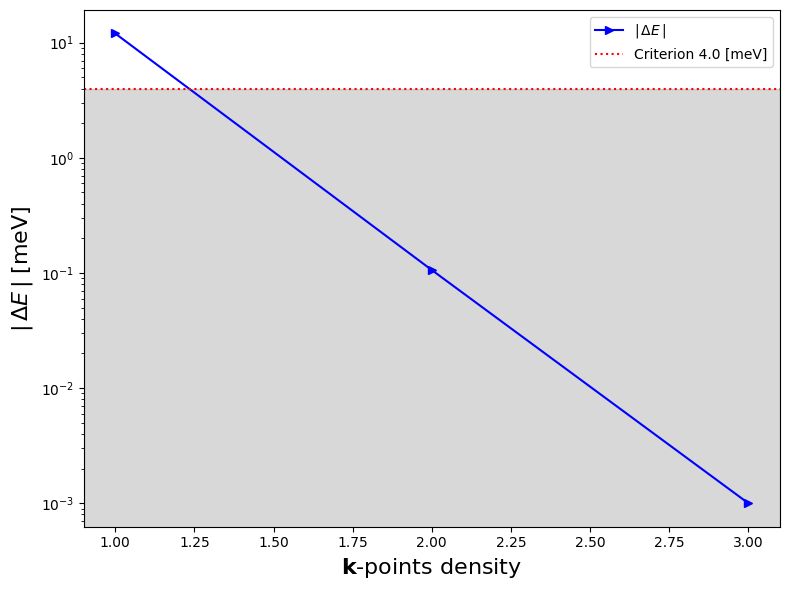

In [10]:
from VaspDefAnalysis.plotter.plot_convergence import ConvergencePlot

plot = ConvergencePlot.get_diff_convergence_plot(relative_values=energies_difference,
                                                 cutoff_values=cutoffs,
                                                 conv_criterion= 0.004,
                                                 #title_name = "Relative energy vs K-Points density",
                                                 title_name = None,
                                                 axis_x_name = r"$\mathbf{k}$-points density",
                                                 axis_y_name = r'$|\,\Delta E \,| $',
                                                 label_relative_values= r'$|\,\Delta E \,| $',
                                                 y_log=True,
                                                 curve_settings ={"color":"blue","marker": ">"},
                                                 SI_unit="eV")
plot.savefig(fname='/home/luis/master_thesis_uio/thesis_project/python_code/outputs/supercell/convergence/convergence_relative_energy_vs_kpoint',dpi=400)

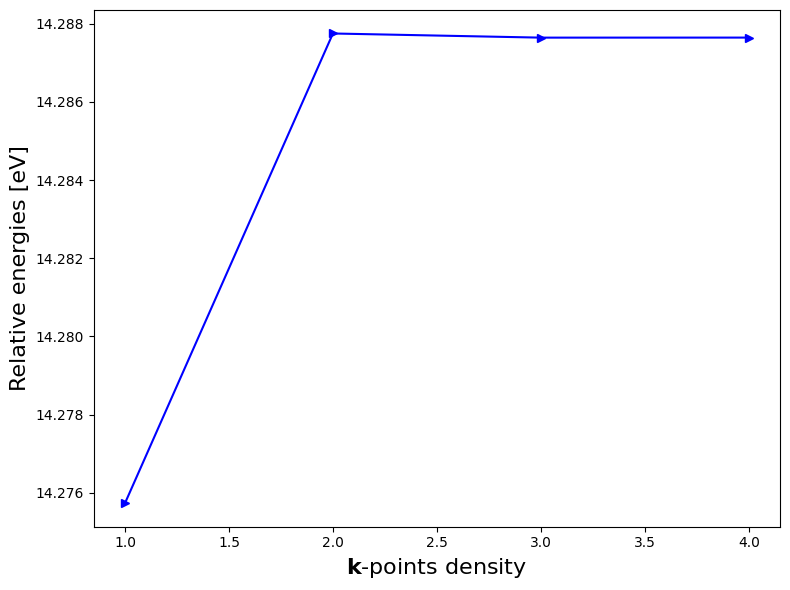

In [11]:
from VaspDefAnalysis.plotter.plot_convergence import ConvergencePlot

plot = ConvergencePlot.get_convergence_plot(relative_values=energies_difference,
                                            cutoff_values=cutoffs,
                                            #title_name = "Relative energy vs K-Points density",
                                            title_name = None,
                                            axis_x_name = r"$\mathbf{k}$-points density",
                                            axis_y_name = 'Relative energies',
                                            curve_settings ={"color":"blue","marker": ">"},
                                            SI_unit="eV",
                                            use_SI_prefixes=None)
plot.savefig(fname='/home/luis/master_thesis_uio/thesis_project/python_code/outputs/supercell/convergence/energy_vs_kpoint',dpi=400)